In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df=pd.read_csv("/content/train.csv")

train_df

In [ ]:
test_df=pd.read_csv("/content/test.csv")
test_df

In [ ]:
df=pd.concat([train_df,test_df])
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",NaN,negative
3530,416863ce47,All alone in this old house again. Thanks for...,NaN,positive
3531,6332da480c,I know what you mean. My little dog is sinkin...,NaN,negative
3532,df1baec676,_sutra what is your next youtube video gonna b...,NaN,positive


In [ ]:
df.shape

(31015, 4)

In [ ]:
df.isnull().sum()

,0
textID,0
text,1
selected_text,3535
sentiment,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
textID,0
text,0
selected_text,0
sentiment,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


<Axes: xlabel='sentiment', ylabel='count'>

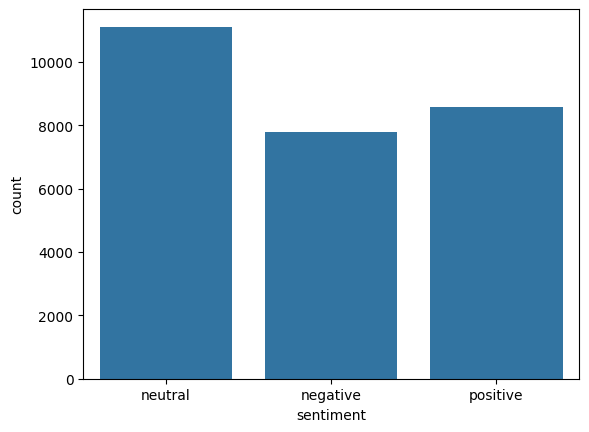

In [ ]:
sns.countplot(df,x='sentiment')

In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
neutral,11117
positive,8582
negative,7781


#Data Cleaning

In [ ]:
import string
import re

In [ ]:
pattern_web =  r"(([\w]+:)?//)?(([\d\w]|%[a-fA-F\d]{2,2})+(:([\d\w]|%[a-fA-f\d]{2,2})+)?@)?([\d\w][-\d\w]{0,253}[\d\w]\.)+[\w]{2,4}(:[\d]+)?(/([-+_~.\d\w]|%[a-fA-f\d]{2,2})*)*(\?(&?([-+_~.\d\w]|%[a-fA-f\d]{2,2})=?)*)?(#([-+_~.\d\w]|%[a-fA-f\d]{2,2})*)?"

In [ ]:
str='''Im going to http://www.example.com google.com https://example.co.uk'''

re.sub(pattern_web,'',str)

'Im going to   '

In [ ]:
pattern_email=r"(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*)@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])"

In [ ]:
str='''Send mail to user@example.com person-1992@fg.co.in manu@epl.co.uk'''

re.sub(pattern_email,' ',str)

'Send mail to      '

In [ ]:
pattern_hash=r'#(\w+)'

In [ ]:
str=''' I'm cool  #Summer2024 but my phone# # 444 Feat#UK '''

re.sub(pattern_hash," \\1",str)  #Keeps the part of expression removing hashtags only

" I'm cool   Summer2024 but my phone# # 444 Feat UK "

In [ ]:
pattern_handle=r'@\w+'  # Only matched if @ followed by alphanumeric characters & underscore

In [ ]:
str=''' @Mike Is ur email gg@hj.com '''

re.sub(pattern_handle," ",str)

'   Is ur email gg .com '

In [ ]:
!pip install emoji

In [ ]:
import emoji

In [ ]:
str='I love python 😊 '

emoji.demojize(str)

'I love python :smiling_face_with_smiling_eyes: '

In [ ]:
!pip install contractions

In [ ]:
import contractions
contractions.safety_keys

{"he'll",
 "he's",
 "i'd",
 "i'll",
 "it's",
 "o'",
 "we'd",
 "we'll",
 "we're",
 "who're"}

In [ ]:
str="I'd have responded, if I were going"

contractions.fix(str)

'I would have responded, if I were going'

In [ ]:
pattern_repeat=r'([A-Za-z])\1{2,}'

In [ ]:
str=''' U r so greaat,lets be friendssss cool '''

re.sub(pattern_repeat,r'\1',str)

' U r so greaat,lets be friends cool '

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
pattern_num=r'[0-9]'

In [ ]:
re.sub(pattern_num," ","i've 4 $ %")

"i've   $ %"

In [ ]:
def pre_process(tweet):

  t_mod=re.sub(pattern_web,'',tweet)

  t_mod=re.sub(pattern_email,' ',t_mod)

  t_mod=re.sub(pattern_hash," \\1",t_mod)

  t_mod=re.sub(pattern_handle," ",t_mod)

  t_mod=emoji.demojize(t_mod)


  pattern_apos=r'`'
  t_mod=re.sub(pattern_apos,"'",t_mod)


  t_mod=contractions.fix(t_mod)

  t_mod=re.sub(pattern_repeat,r'\1',t_mod)


  pattern_num=r'[0-9]'

  t_mod=re.sub(pattern_num," ",t_mod)


  pattern_punc="[" + re.escape(string.punctuation) + "]"

  t_mod=re.sub(pattern_punc," ",t_mod)


  t_mod=t_mod.lower()


  pattern_space=r'\s+'

  t_mod=re.sub(pattern_space," ",t_mod)


  return t_mod

In [ ]:
df['cleaned_text']=df['text'].apply(pre_process)

In [ ]:
df

,textID,text,selected_text,sentiment,cleaned_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,i would have responded if i were going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,so sad i will miss you here in san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons of why could not they put them on the re...
...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,wish we could come see you on denver husband ...
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,i have wondered about rake to the client has ...
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,yay good for both of you enjoy the break you ...
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,but it was worth it


#Preprocessing

In [ ]:
from nltk.tokenize import TreebankWordTokenizer

In [ ]:
tokenizer=TreebankWordTokenizer()

In [ ]:
df['tokens']=df['cleaned_text'].apply(lambda x:tokenizer.tokenize(x))

In [ ]:
df

,textID,text,selected_text,sentiment,cleaned_text,tokens
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,i would have responded if i were going,"[i, would, have, responded, if, i, were, going]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,so sad i will miss you here in san diego,"[so, sad, i, will, miss, you, here, in, san, d..."
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me,"[my, boss, is, bullying, me]"
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone,"[what, interview, leave, me, alone]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons of why could not they put them on the re...,"[sons, of, why, could, not, they, put, them, o..."
...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,wish we could come see you on denver husband ...,"[wish, we, could, come, see, you, on, denver, ..."
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,i have wondered about rake to the client has ...,"[i, have, wondered, about, rake, to, the, clie..."
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,yay good for both of you enjoy the break you ...,"[yay, good, for, both, of, you, enjoy, the, br..."
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,but it was worth it,"[but, it, was, worth, it]"


In [ ]:
df['token_len']=df['tokens'].apply(lambda x:len(x))

In [ ]:
df

,textID,text,selected_text,sentiment,cleaned_text,tokens,token_len
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,i would have responded if i were going,"[i, would, have, responded, if, i, were, going]",8
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,so sad i will miss you here in san diego,"[so, sad, i, will, miss, you, here, in, san, d...",10
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me,"[my, boss, is, bullying, me]",5
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone,"[what, interview, leave, me, alone]",5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons of why could not they put them on the re...,"[sons, of, why, could, not, they, put, them, o...",14
...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,wish we could come see you on denver husband ...,"[wish, we, could, come, see, you, on, denver, ...",17
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,i have wondered about rake to the client has ...,"[i, have, wondered, about, rake, to, the, clie...",25
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,yay good for both of you enjoy the break you ...,"[yay, good, for, both, of, you, enjoy, the, br...",21
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,but it was worth it,"[but, it, was, worth, it]",5


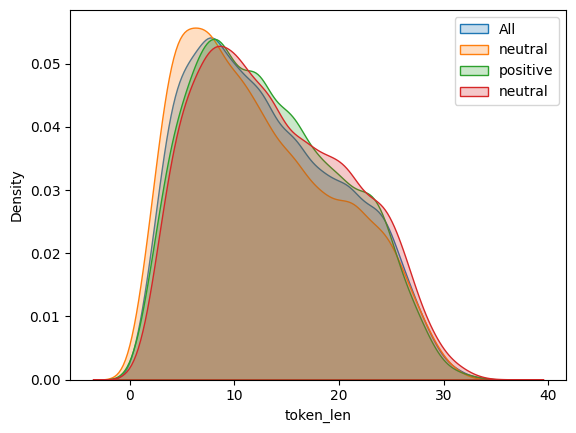

In [ ]:
sns.kdeplot(df,x='token_len',legend='All',fill=True,label='All')

sns.kdeplot(df[df['sentiment']=='neutral'],x='token_len',label='neutral',fill=True)

sns.kdeplot(df[df['sentiment']=='positive'],x='token_len',label='positive',fill=True)

sns.kdeplot(df[df['sentiment']=='negative'],x='token_len',label='neutral',fill=True)

plt.legend()
plt.show()

In [ ]:
from collections import Counter

In [ ]:
ct=Counter()

for token_list in df['tokens']:

  ct.update(token_list)

In [ ]:
sum(list(ct.values()))

362681

In [ ]:
#Most common words in tweets

dict(ct.most_common(50))

{'i': 17681,
 'to': 10979,
 'the': 9124,
 'a': 6819,
 'you': 6641,
 'is': 6639,
 'not': 6101,
 'my': 5549,
 'it': 5424,
 'and': 5170,
 'am': 4115,
 'in': 3818,
 'for': 3658,
 'have': 3297,
 'of': 3284,
 'that': 3170,
 'me': 2877,
 'on': 2875,
 'so': 2870,
 'do': 2446,
 'but': 2406,
 'are': 2309,
 'just': 2277,
 'day': 2166,
 'with': 2098,
 'be': 2023,
 'was': 1980,
 'at': 1901,
 'can': 1876,
 'will': 1860,
 'all': 1685,
 'now': 1595,
 'good': 1579,
 'this': 1572,
 'going': 1569,
 'out': 1523,
 'up': 1508,
 's': 1455,
 'no': 1447,
 'get': 1434,
 'like': 1353,
 'go': 1286,
 'got': 1248,
 'love': 1207,
 'your': 1170,
 'today': 1155,
 'work': 1152,
 'too': 1127,
 'what': 1085,
 'we': 1039}

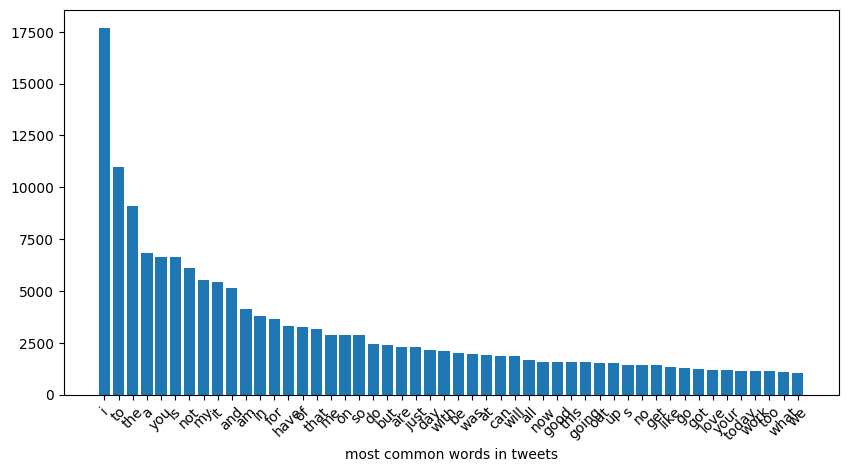

In [ ]:
plt.figure(figsize=(10,5))

plt.bar(x=dict(ct.most_common(50)).keys(),height=dict(ct.most_common(50)).values())

plt.xticks(rotation=45)

plt.xlabel('most common words in tweets')

plt.show()

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopword_list=stopwords.words('english')

In [ ]:
df['tokens_wo_stopwords']=df['tokens'].apply(lambda x:[i for i in x if i not in stopword_list])

In [ ]:
df

,textID,text,selected_text,sentiment,cleaned_text,tokens,token_len,tokens_wo_stopwords
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,i would have responded if i were going,"[i, would, have, responded, if, i, were, going]",8,"[would, responded, going]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,so sad i will miss you here in san diego,"[so, sad, i, will, miss, you, here, in, san, d...",10,"[sad, miss, san, diego]"
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me,"[my, boss, is, bullying, me]",5,"[boss, bullying]"
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone,"[what, interview, leave, me, alone]",5,"[interview, leave, alone]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons of why could not they put them on the re...,"[sons, of, why, could, not, they, put, them, o...",14,"[sons, could, put, releases, already, bought]"
...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,wish we could come see you on denver husband ...,"[wish, we, could, come, see, you, on, denver, ...",17,"[wish, could, come, see, denver, husband, lost..."
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,i have wondered about rake to the client has ...,"[i, have, wondered, about, rake, to, the, clie...",25,"[wondered, rake, client, made, clear, net, for..."
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,yay good for both of you enjoy the break you ...,"[yay, good, for, both, of, you, enjoy, the, br...",21,"[yay, good, enjoy, break, probably, need, hect..."
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,but it was worth it,"[but, it, was, worth, it]",5,[worth]


In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
lemmatizer.lemmatize('gives')

'give'

In [ ]:
df['tokens_lemma']=df['tokens_wo_stopwords'].apply(lambda x:[lemmatizer.lemmatize(i) for i in x])

In [ ]:
ct_all=Counter()

ct_neutral=Counter()

ct_positive=Counter()

ct_negative=Counter()



for token_list in df['tokens_lemma']:

  ct_all.update(token_list)



for token_list in df[df['sentiment']=='neutral']['tokens_lemma']:

  ct_neutral.update(token_list)



for token_list in df[df['sentiment']=='positive']['tokens_lemma']:
  ct_positive.update(token_list)



for token_list in df[df['sentiment']=='negative']['tokens_lemma']:

  ct_negative.update(token_list)

In [ ]:
dict(ct_all.most_common(50)).values()

dict_values([2508, 1580, 1569, 1528, 1380, 1365, 1287, 1248, 1201, 1163, 1099, 1090, 1075, 1045, 1030, 996, 930, 919, 821, 819, 795, 764, 751, 749, 748, 744, 721, 716, 689, 665, 655, 636, 626, 621, 613, 604, 591, 590, 571, 569, 559, 550, 543, 540, 532, 523, 520, 494, 492, 492])

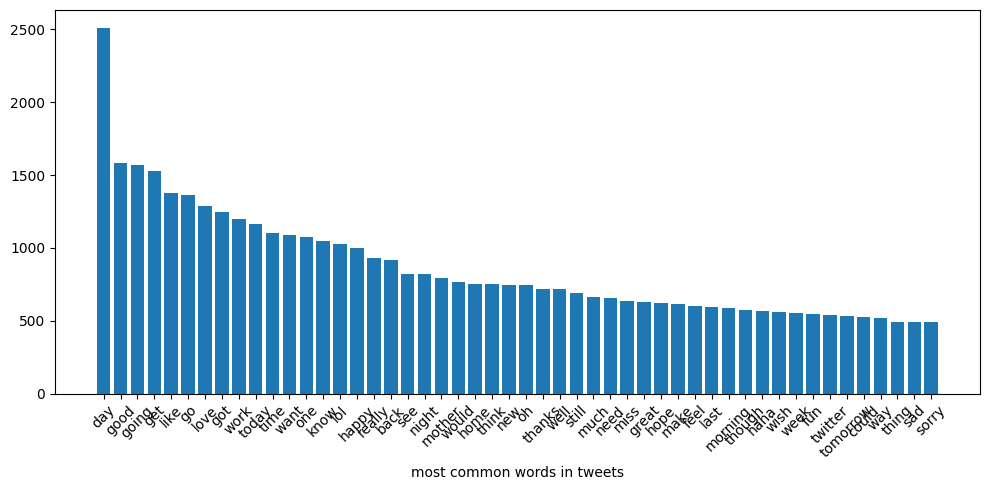

In [ ]:
plt.figure(figsize=(10,5))

plt.bar(x=dict(ct_all.most_common(50)).keys(),height=dict(ct_all.most_common(50)).values())

plt.xticks(rotation=45)

plt.xlabel('most common words in tweets')

plt.tight_layout()

plt.show()

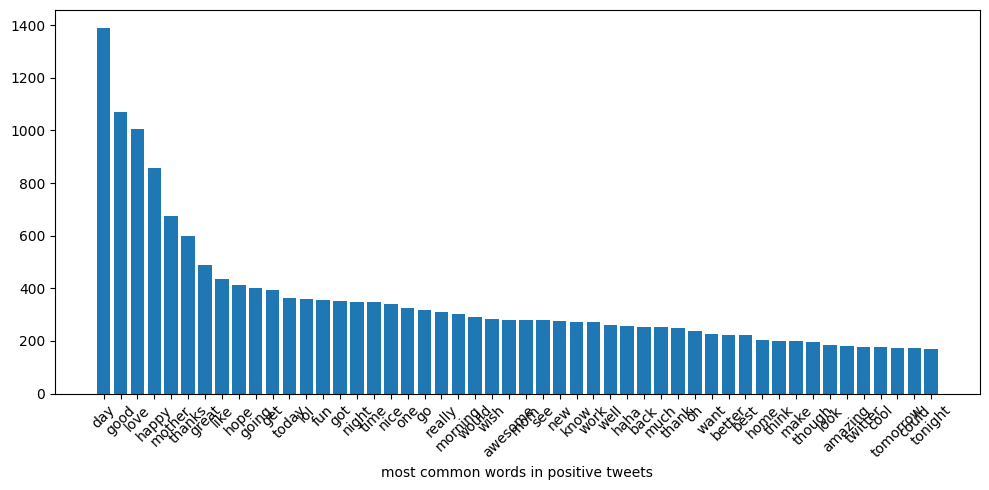

In [ ]:
plt.figure(figsize=(10,5))

plt.bar(x=dict(ct_positive.most_common(50)).keys(),height=dict(ct_positive.most_common(50)).values())

plt.xticks(rotation=45)

plt.xlabel('most common words in positive tweets')

plt.tight_layout()

plt.show()

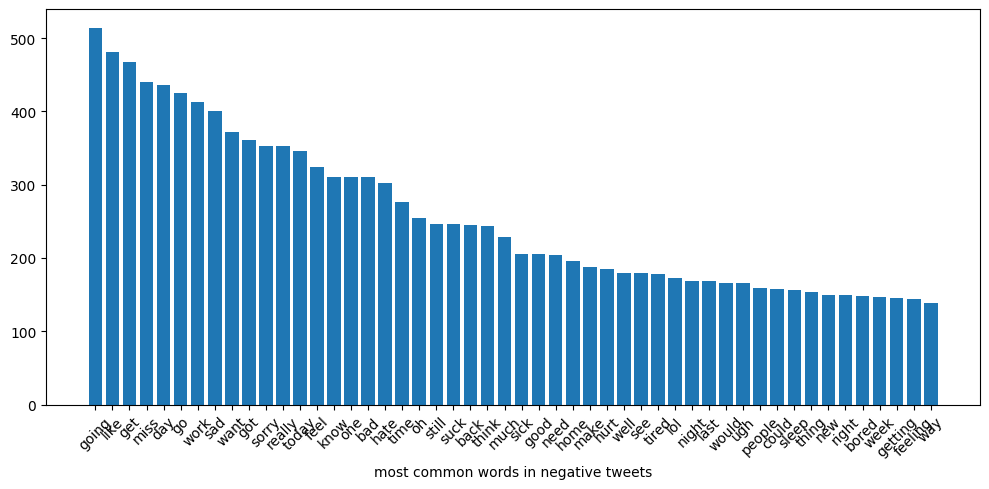

In [ ]:
plt.figure(figsize=(10,5))

plt.bar(x=dict(ct_negative.most_common(50)).keys(),height=dict(ct_negative.most_common(50)).values())

plt.xticks(rotation=45)

plt.xlabel('most common words in negative tweets')

plt.tight_layout()

plt.show()

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
def generate_wordcloud(list_,label_list):

  plt.figure(figsize=(10,20))

  k=1

  for i in list_:

    plt.subplot(len(list_),1,k)

    word_cloud=WordCloud()

    word_cloud.generate_from_frequencies(i)

    plt.imshow(word_cloud)

    plt.grid(False)

    plt.xticks([])

    plt.yticks([])

    plt.xlabel(label_list[k-1])

    k+=1

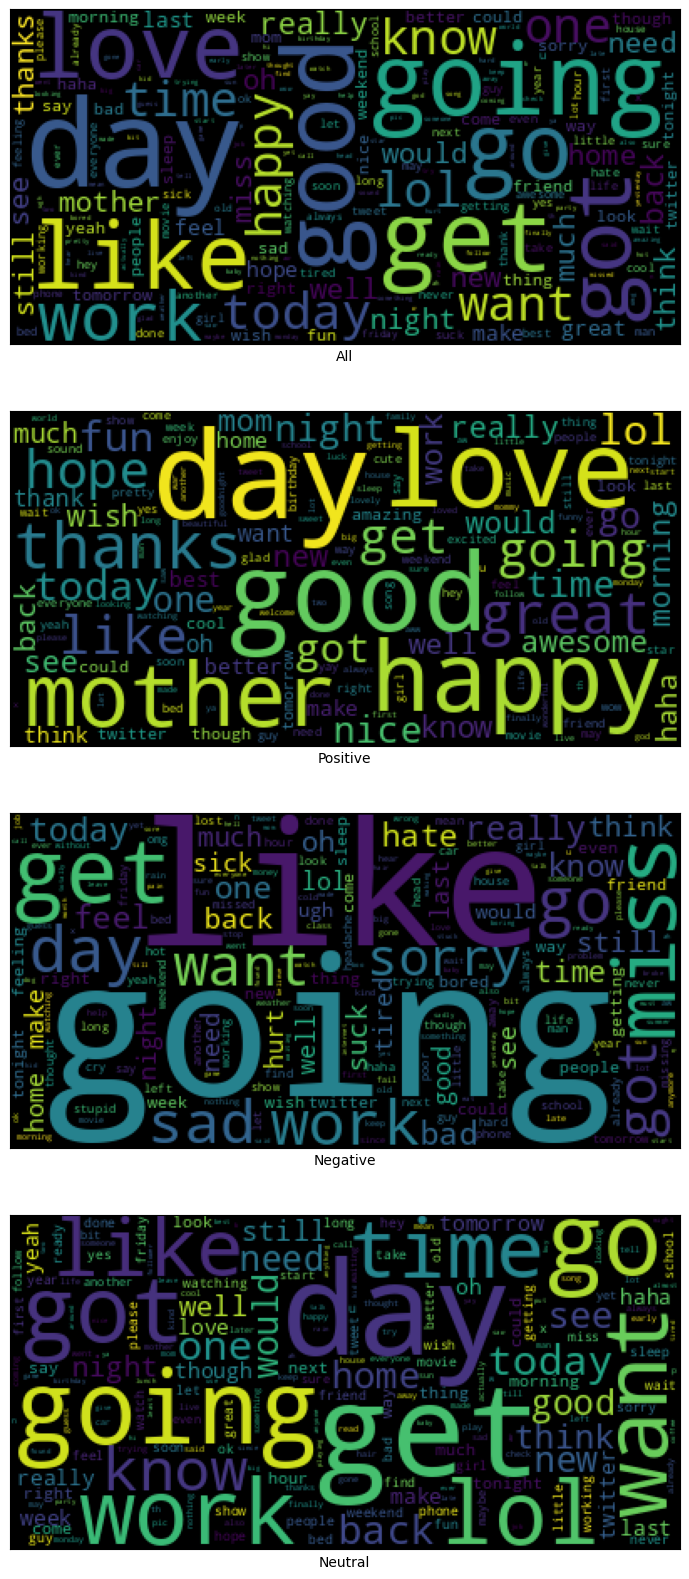

In [ ]:
generate_wordcloud([ct_all,ct_positive,ct_negative,ct_neutral],['All','Positive','Negative','Neutral'])

In [ ]:
df_chosen=df[['tokens','sentiment']]

df_chosen

,tokens,sentiment
0,"[i, would, have, responded, if, i, were, going]",neutral
1,"[so, sad, i, will, miss, you, here, in, san, d...",negative
2,"[my, boss, is, bullying, me]",negative
3,"[what, interview, leave, me, alone]",negative
4,"[sons, of, why, could, not, they, put, them, o...",negative
...,...,...
27476,"[wish, we, could, come, see, you, on, denver, ...",negative
27477,"[i, have, wondered, about, rake, to, the, clie...",negative
27478,"[yay, good, for, both, of, you, enjoy, the, br...",positive
27479,"[but, it, was, worth, it]",positive


In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df_chosen['sentiment']=le.fit_transform(df_chosen['sentiment'])

df_chosen


<ipython-input-69-ab8f50d30195>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chosen['sentiment']=le.fit_transform(df_chosen['sentiment'])


,tokens,sentiment
0,"[i, would, have, responded, if, i, were, going]",1
1,"[so, sad, i, will, miss, you, here, in, san, d...",0
2,"[my, boss, is, bullying, me]",0
3,"[what, interview, leave, me, alone]",0
4,"[sons, of, why, could, not, they, put, them, o...",0
...,...,...
27476,"[wish, we, could, come, see, you, on, denver, ...",0
27477,"[i, have, wondered, about, rake, to, the, clie...",0
27478,"[yay, good, for, both, of, you, enjoy, the, br...",2
27479,"[but, it, was, worth, it]",2


In [ ]:
df_chosen['sentiment'].value_counts()

,count
sentiment,
1,11117
2,8582
0,7781


In [ ]:


df_chosen['sentence']=df_chosen['tokens'].apply(lambda x:" ".join(x))
df_chosen

<ipython-input-71-df62b6bdf886>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chosen['sentence']=df_chosen['tokens'].apply(lambda x:" ".join(x))


,tokens,sentiment,sentence
0,"[i, would, have, responded, if, i, were, going]",1,i would have responded if i were going
1,"[so, sad, i, will, miss, you, here, in, san, d...",0,so sad i will miss you here in san diego
2,"[my, boss, is, bullying, me]",0,my boss is bullying me
3,"[what, interview, leave, me, alone]",0,what interview leave me alone
4,"[sons, of, why, could, not, they, put, them, o...",0,sons of why could not they put them on the rel...
...,...,...,...
27476,"[wish, we, could, come, see, you, on, denver, ...",0,wish we could come see you on denver husband l...
27477,"[i, have, wondered, about, rake, to, the, clie...",0,i have wondered about rake to the client has m...
27478,"[yay, good, for, both, of, you, enjoy, the, br...",2,yay good for both of you enjoy the break you p...
27479,"[but, it, was, worth, it]",2,but it was worth it


<ipython-input-72-5b7922248174>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chosen['sentence_length']=df_chosen['sentence'].apply(lambda x:len(x.split()))


<Axes: xlabel='sentence_length'>

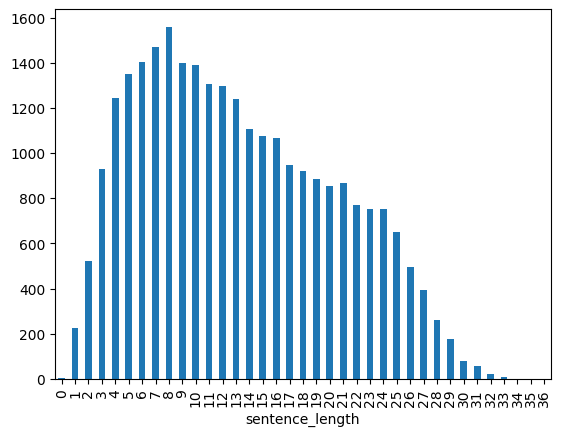

In [ ]:
#Checking the length of sentence
df_chosen['sentence_length']=df_chosen['sentence'].apply(lambda x:len(x.split()))
df_chosen['sentence_length'].value_counts().sort_index().plot.bar()

In [ ]:
df_final = df_chosen[df_chosen['sentence_length'] != 0]

In [ ]:
x = df_final['sentence']
y = df_final['sentiment']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
import sklearn.feature_extraction.text as text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train_vec = vectorizer.fit_transform(X_train)

X_test_vec = vectorizer.transform(X_test)


Training Logistic Regression...
=== Logistic Regression ===
Accuracy: 0.6890
F1 Score: 0.6895
Recall: 0.6890
Precision: 0.7008
Confusion Matrix:
[[ 922  570   85]
 [ 299 1613  241]
 [  64  450 1252]]
----------------------------------------


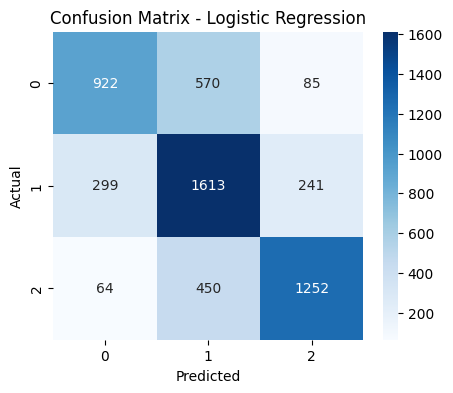

Training Decision Tree Classifier...
=== Decision Tree Classifier ===
Accuracy: 0.5349
F1 Score: 0.5269
Recall: 0.5349
Precision: 0.5917
Confusion Matrix:
[[ 553  975   49]
 [ 417 1625  111]
 [ 148  856  762]]
----------------------------------------


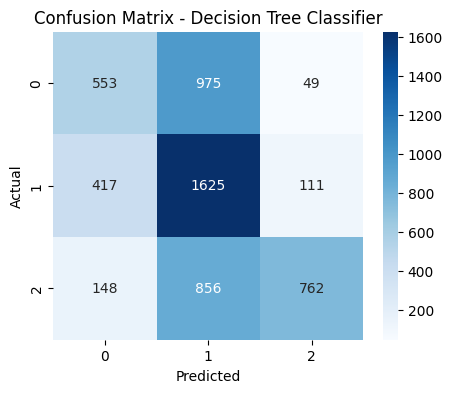

Training Random Forest Classifier...
=== Random Forest Classifier ===
Accuracy: 0.4247
F1 Score: 0.2875
Recall: 0.4247
Precision: 0.7010
Confusion Matrix:
[[   5 1568    4]
 [   0 2146    7]
 [   1 1582  183]]
----------------------------------------


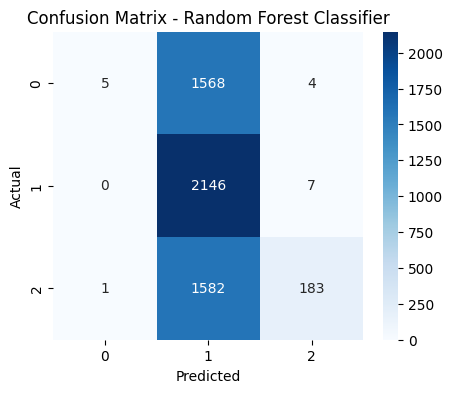

Training Gradient Boosting Classifier...
=== Gradient Boosting Classifier ===
Accuracy: 0.6410
F1 Score: 0.6351
Recall: 0.6410
Precision: 0.6856
Confusion Matrix:
[[ 669  843   65]
 [ 191 1788  174]
 [  58  642 1066]]
----------------------------------------


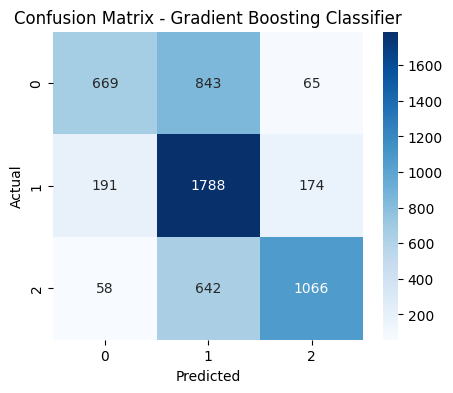

Training Support Vector Classifier...
=== Support Vector Classifier ===
Accuracy: 0.6963
F1 Score: 0.6965
Recall: 0.6963
Precision: 0.7210
Confusion Matrix:
[[ 889  630   58]
 [ 236 1731  186]
 [  47  512 1207]]
----------------------------------------


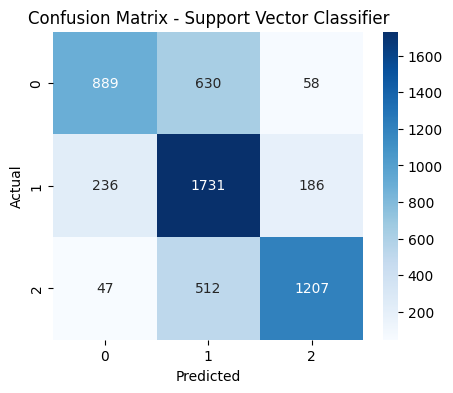

Training XGB Classifier...
=== XGB Classifier ===
Accuracy: 0.6265
F1 Score: 0.6170
Recall: 0.6265
Precision: 0.6832
Confusion Matrix:
[[ 604  916   57]
 [ 151 1829  173]
 [  57  699 1010]]
----------------------------------------


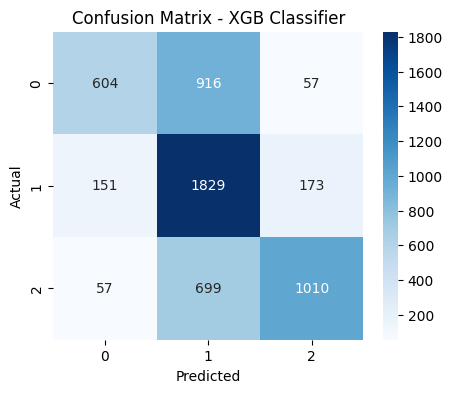

Training KNN Classifier...
=== KNN Classifier ===
Accuracy: 0.5635
F1 Score: 0.5631
Recall: 0.5635
Precision: 0.5655
Confusion Matrix:
[[ 776  590  211]
 [ 420 1260  473]
 [ 164  541 1061]]
----------------------------------------


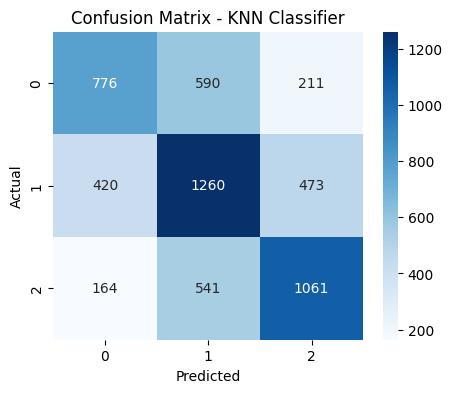


📊 Summary Table:
                          Model  Accuracy  F1 Score    Recall  Precision
0     Support Vector Classifier  0.696325  0.696540  0.696325   0.720966
1           Logistic Regression  0.689047  0.689535  0.689047   0.700804
2  Gradient Boosting Classifier  0.641012  0.635127  0.641012   0.685586
3                XGB Classifier  0.626456  0.617043  0.626456   0.683200
4                KNN Classifier  0.563501  0.563080  0.563501   0.565532
5      Decision Tree Classifier  0.534934  0.526919  0.534934   0.591686
6      Random Forest Classifier  0.424672  0.287529  0.424672   0.700956


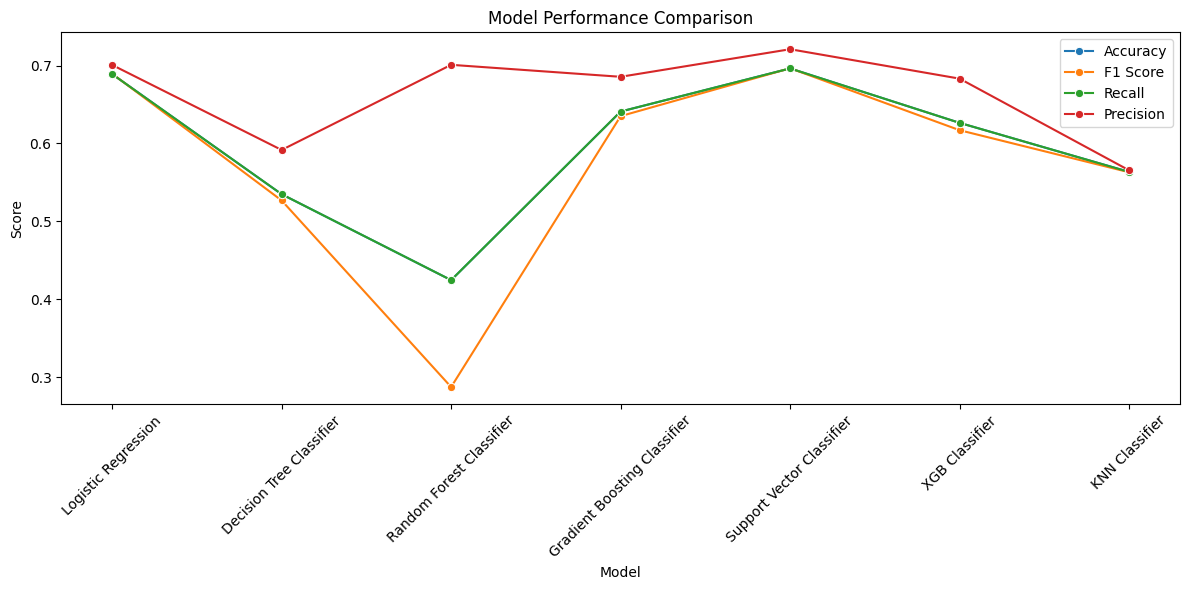

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore", category=UserWarning)

Models = {
    'Logistic Regression': LogisticRegression(C=1.0, solver='liblinear', max_iter=1000),
    'Decision Tree Classifier': DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting Classifier': GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42),
    'Support Vector Classifier': SVC(kernel='rbf', C=1.0, gamma='scale', probability=True),
    'XGB Classifier': XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, use_label_encoder=False, eval_metric='logloss'),
    'KNN Classifier': KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')
}

results = []


for name, model in Models.items():
    print(f"Training {name}...")

    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    print(f"=== {name} ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("-" * 40)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Recall': recall,
        'Precision': precision
    })


results_df = pd.DataFrame(results)
print("\n📊 Summary Table:")
print(results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True))


metrics = ['Accuracy', 'F1 Score', 'Recall', 'Precision']
plt.figure(figsize=(12, 6))
for metric in metrics:
    sns.lineplot(x='Model', y=metric, data=results_df, label=metric, marker='o')

plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
results_df

,Model,Accuracy,F1 Score,Recall,Precision
0,Logistic Regression,0.689047,0.689535,0.689047,0.700804
1,Decision Tree Classifier,0.534934,0.526919,0.534934,0.591686
2,Random Forest Classifier,0.424672,0.287529,0.424672,0.700956
3,Gradient Boosting Classifier,0.641012,0.635127,0.641012,0.685586
4,Support Vector Classifier,0.696325,0.696540,0.696325,0.720966
5,XGB Classifier,0.626456,0.617043,0.626456,0.683200
6,KNN Classifier,0.563501,0.563080,0.563501,0.565532


In [ ]:
import joblib

model = LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=1000)
model.fit(X_train_vec, y_train)

joblib.dump(model, "LogisticRegression.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']

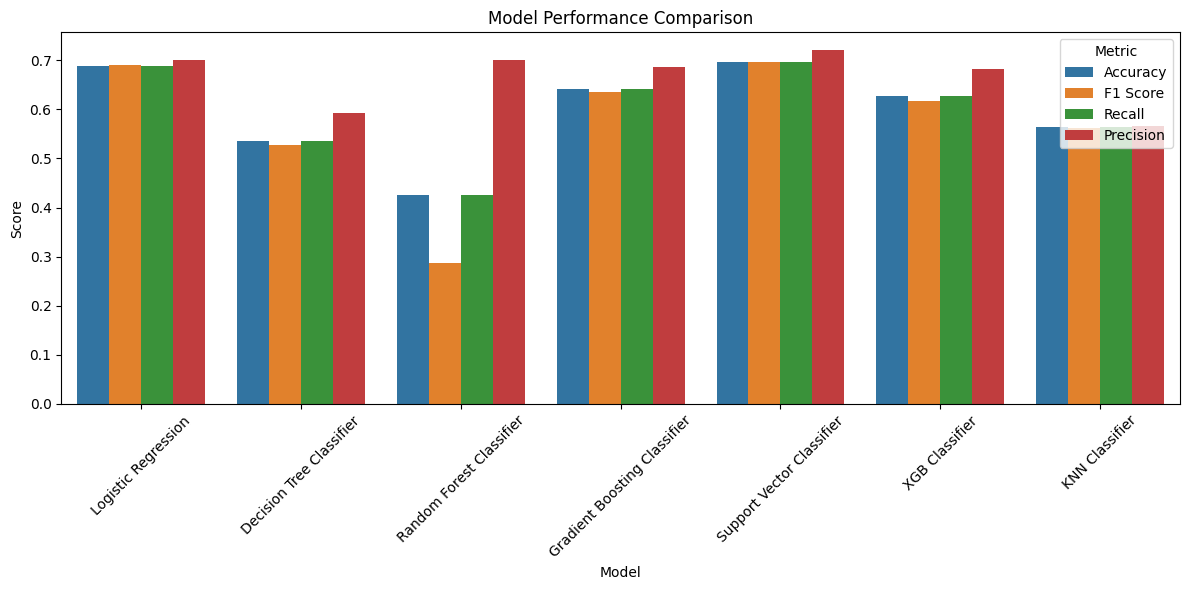

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


results_df = pd.DataFrame(results)

metrics = ['Accuracy', 'F1 Score', 'Recall', 'Precision']
results_df_melted = results_df.melt(id_vars=["Model"], value_vars=metrics, var_name="Metric", value_name="Score")


plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_df_melted)
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_vec.shape[1],)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train_vec, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

y_pred = model.predict(X_test_vec)

y_pred_classes = np.argmax(y_pred, axis=1)

nn_results = {
    'Model': 'Neural Network',
    'Accuracy': accuracy_score(y_test, y_pred_classes),
    'F1 Score': f1_score(y_test, y_pred_classes, average='weighted'),
    'Recall': recall_score(y_test, y_pred_classes, average='weighted'),
    'Precision': precision_score(y_test, y_pred_classes, average='weighted')
}
metrics = ['Accuracy', 'F1 Score', 'Recall', 'Precision']

results_df_nn = pd.DataFrame([nn_results])
results_df_melted = results_df_nn.melt(id_vars=["Model"], value_vars=metrics, var_name="Metric", value_name="Score")


plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_df_melted)
plt.title("Neural Network Performance")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('neural_network_performance.png')
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

print("precision_score    : ", precision_score(y_test, predicted_labels, average='weighted'))
print("recall_score       : ", recall_score(y_test, predicted_labels, average='weighted'))
print("f1_score           : ", f1_score(y_test, predicted_labels, average='weighted'))

print("-----------------------------------------------------------------------")
df_data = pd.DataFrame({
    "Actual": y_test.ravel(),
    "Predicted": predicted_labels.flatten()
})
print(df_data.head())
print("-----------------------------------------------------------------------")

NameError: name 'predicted_labels' is not defined